(1258, 2)


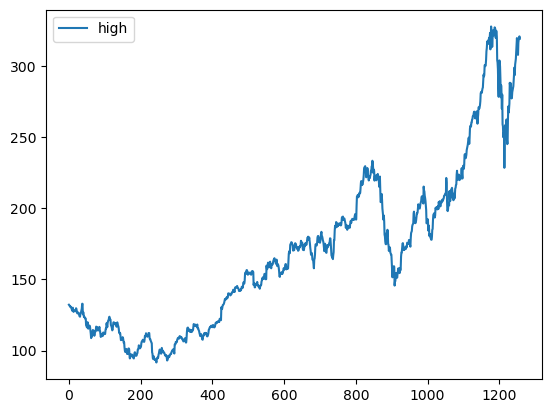

In [2]:
import pandas as pd
from prophet import Prophet
data = pd.read_csv("AAPL.csv")
X = data.loc[:, ['date','high']]
print(X.shape)
X.plot();

In [9]:
X.columns = ['ds', 'y']
X['ds']= pd.to_datetime(X['ds'], format='%Y-%m-%d %H:%M:%S.%f').dt.date

model = Prophet()
# fit the model 
model.fit(X)

22:27:47 - cmdstanpy - INFO - Chain [1] start processing
22:27:47 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=365,
                                    freq='D',
                                    include_history=False
                                    )
future.tail()

,ds
360,2021-05-18
361,2021-05-19
362,2021-05-20
363,2021-05-21
364,2021-05-22


In [11]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail

<bound method NDFrame.tail of             ds        yhat  yhat_lower  yhat_upper
0   2020-05-23  306.855830  291.384339  321.160730
1   2020-05-24  306.920556  293.302685  321.326628
2   2020-05-25  310.227596  296.181461  324.583600
3   2020-05-26  310.933830  294.917438  324.254364
4   2020-05-27  310.954522  295.614787  324.971453
..         ...         ...         ...         ...
360 2021-05-18  425.695552  349.727983  497.949357
361 2021-05-19  425.797053  353.631099  495.067996
362 2021-05-20  425.833639  355.145294  493.739458
363 2021-05-21  425.762764  351.907416  494.443478
364 2021-05-22  422.252465  347.077207  492.111303

[365 rows x 4 columns]>

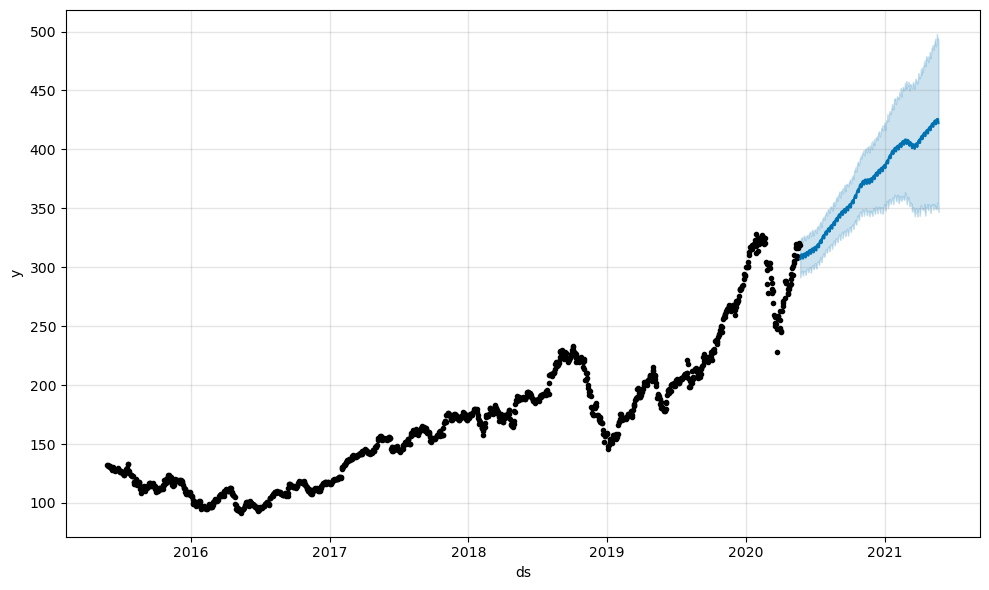

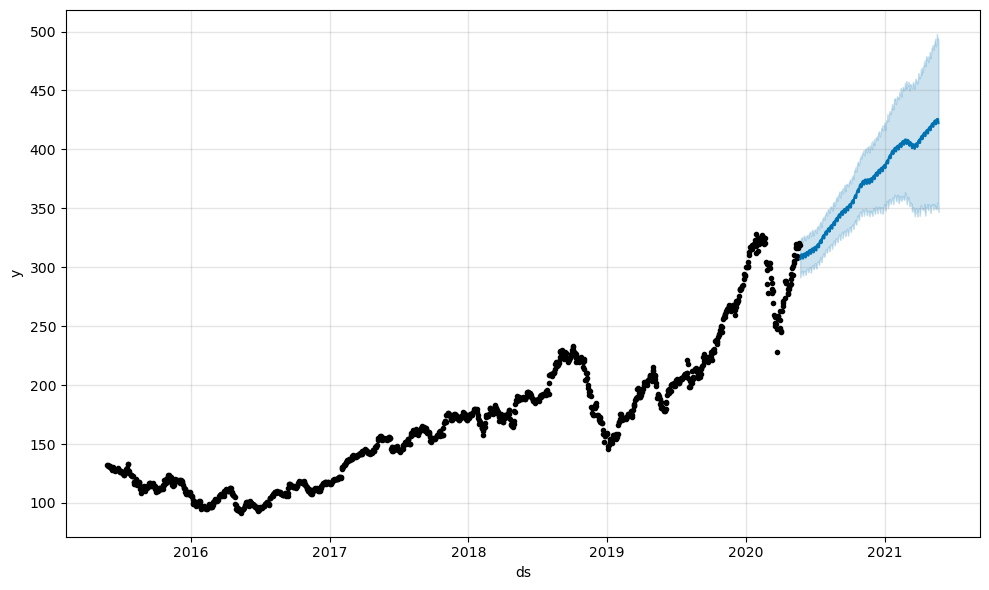

In [12]:
model.plot(forecast)

In [14]:
from tabpy.tabpy_tools.client import Client

client = Client('http://localhost:9004/')

def prophet_forecasting(n):
 
    future = model.make_future_dataframe(periods=365*n,include_history=False)
    prediction = model.predict(future)
    prediction.rename(columns={"yhat":"y"}, inplace=True)
 
    return pd.concat([X,prediction[['ds','y']]])['y'].to_list()[365*n:]

client.deploy('prophet',
              prophet_forecasting,
              'forecast time series data using prophet',override=True)